# Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [ ]:
df = pd.read_csv("/content/hotel_bookings_2.csv")

# EDA and Data cleaning

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df["reservation_status_date"] = pd.to_datetime(df['reservation_status_date'])

In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

# Handling Null values

In [ ]:
df.drop(['agent', 'company'], axis = 1, inplace = True)
df.dropna(inplace = True)

In [ ]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


# Handling outliers
did only in adr(average daily rate) becoz we need the adr for our analysis.

In [ ]:
df = df[df['adr']<5000]

# **Data analysis and Visualizations**

**Cancellation count graph**

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64


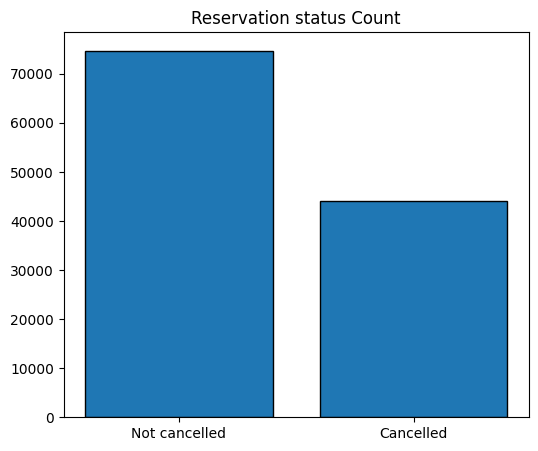

In [ ]:
cancelled_perc = df['is_canceled'].value_counts(normalize = True)
print(cancelled_perc)

plt.figure(figsize = (6,5))
plt.title('Reservation status Count')
plt.bar(['Not cancelled', 'Cancelled'], df['is_canceled'].value_counts(), edgecolor = 'black', width = 0.8)
plt.show()

Which hotel has more cancellation?

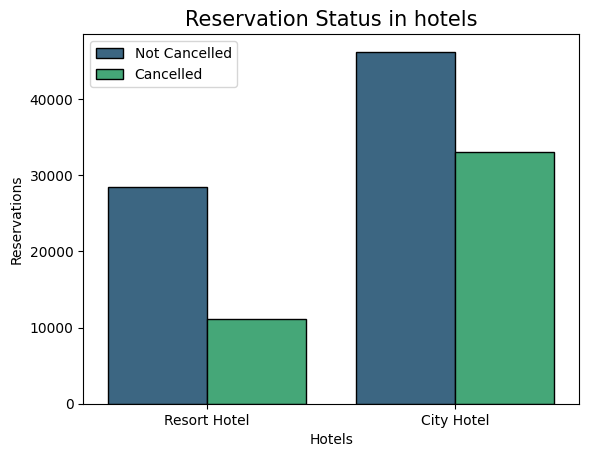

In [ ]:
axis1 = sns.countplot(x = 'hotel', hue = 'is_canceled', data = df, palette = 'viridis', edgecolor = 'black')
legend_labels = axis1.get_legend_handles_labels()
axis1.legend(loc = 'upper right')
plt.title("Reservation Status in hotels", size = 15)
plt.ylabel('Reservations')
plt.xlabel('Hotels')
plt.legend(['Not Cancelled', 'Cancelled'])
plt.show()

In [ ]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)                       # Normalize = True is used basically to see the percentage difference

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [ ]:
city_hotel = df[df['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True)

0    0.582918
1    0.417082
Name: is_canceled, dtype: float64

In [ ]:
resort_hotel = resort_hotel.groupby('reservation_status_date')['adr'].mean().reset_index()
city_hotel = city_hotel.groupby('reservation_status_date')['adr'].mean().reset_index()

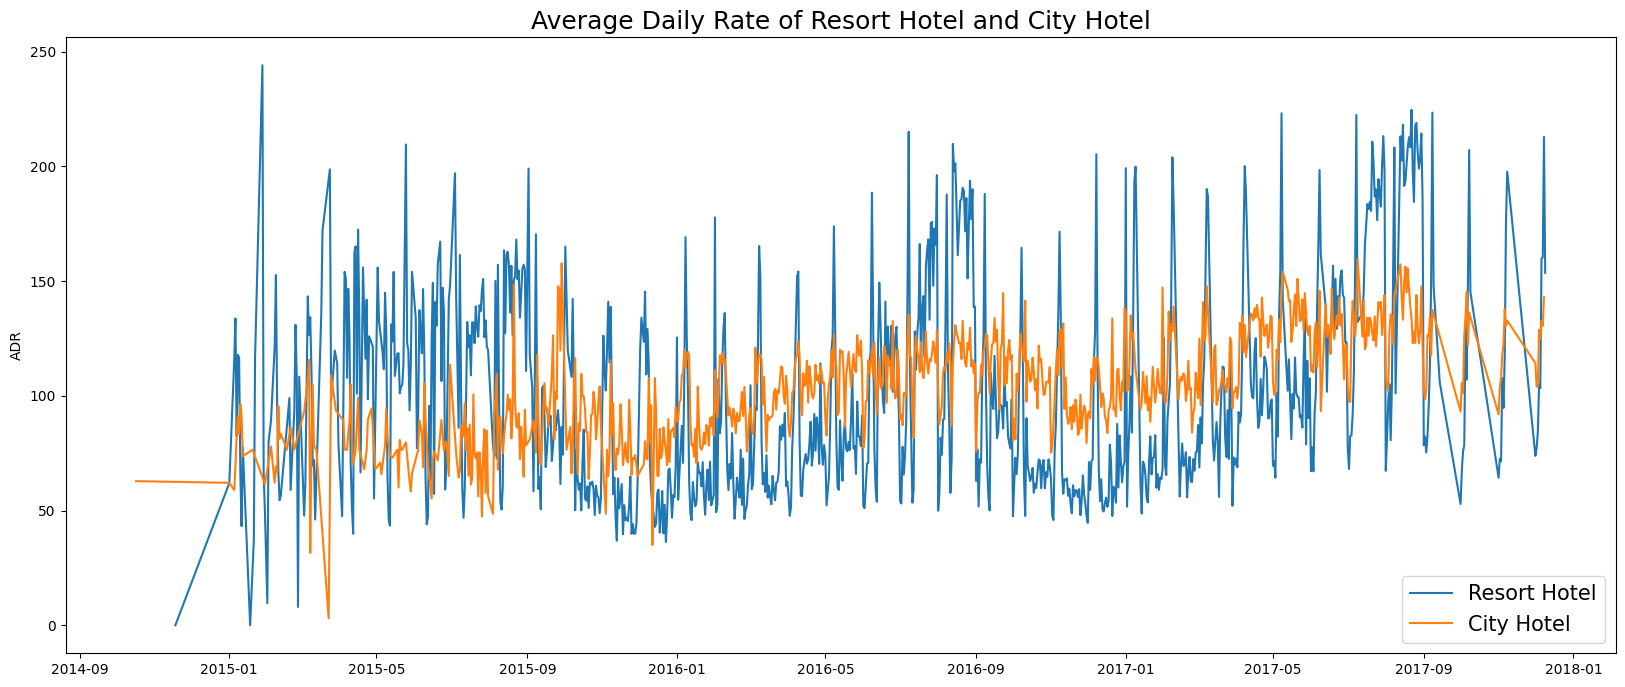

In [ ]:
plt.figure(figsize = (20,8))
plt.title('Average Daily Rate of Resort Hotel and City Hotel', fontsize = 18)
plt.plot(resort_hotel['reservation_status_date'], resort_hotel['adr'], label = 'Resort Hotel')
plt.plot(city_hotel['reservation_status_date'], city_hotel['adr'], label = 'City Hotel')
plt.ylabel('ADR')
plt.legend(fontsize = 15)
plt.show()

In [ ]:
df['month'] = df['reservation_status_date'].dt.month_name().str[:3]

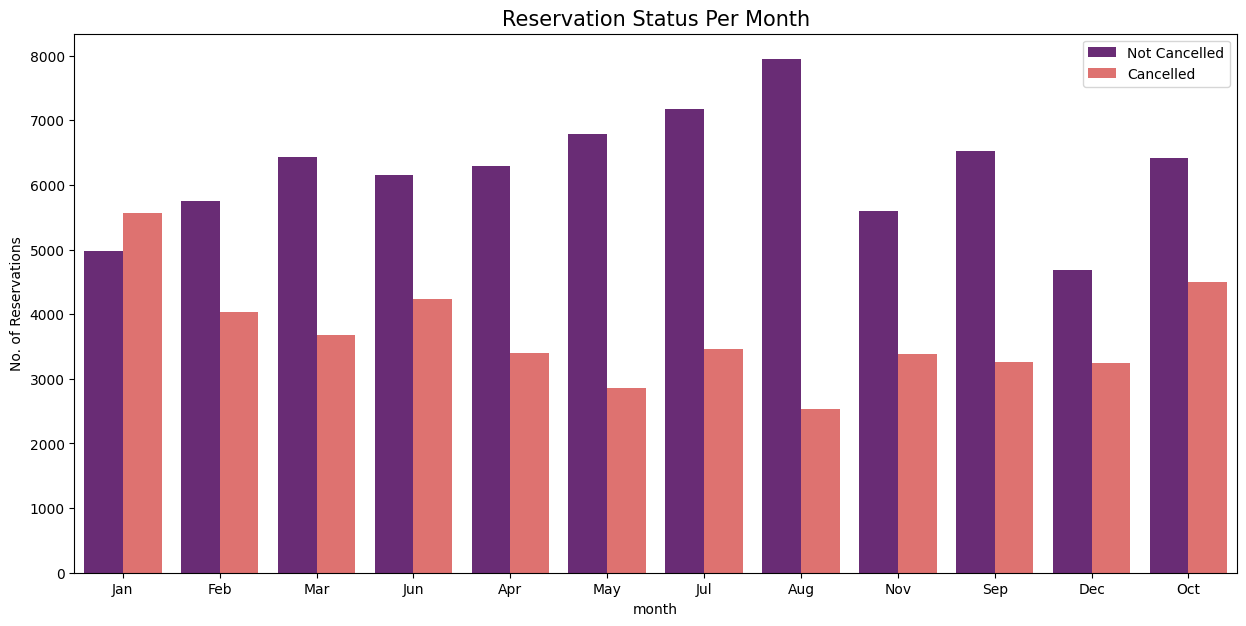

In [ ]:
plt.figure(figsize = (15,7))
ax1 = sns.countplot(x = 'month', hue = 'is_canceled', data = df, palette = 'magma')
ax1.legend(loc = 'best')
plt.title('Reservation Status Per Month', fontsize = 15)
plt.ylabel('No. of Reservations')
plt.legend(['Not Cancelled', 'Cancelled'])
plt.show()

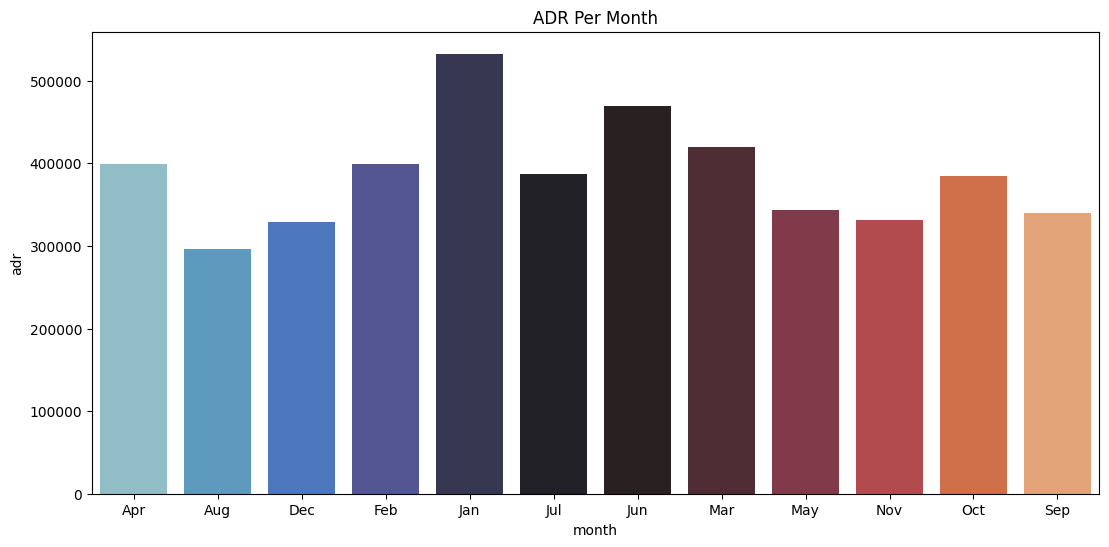

In [ ]:
plt.figure(figsize = (13,6))
sns.barplot(x = 'month', y = 'adr', data = df[df['is_canceled'] == 1].groupby('month')['adr'].sum().reset_index(), hue = 'month', palette = 'icefire')
plt.title('ADR Per Month', fontsize = 12)
plt.show()

In [ ]:
cancelled_data = df[df['is_canceled'] == 1]
top_10_countries = cancelled_data['country'].value_counts()[:10]

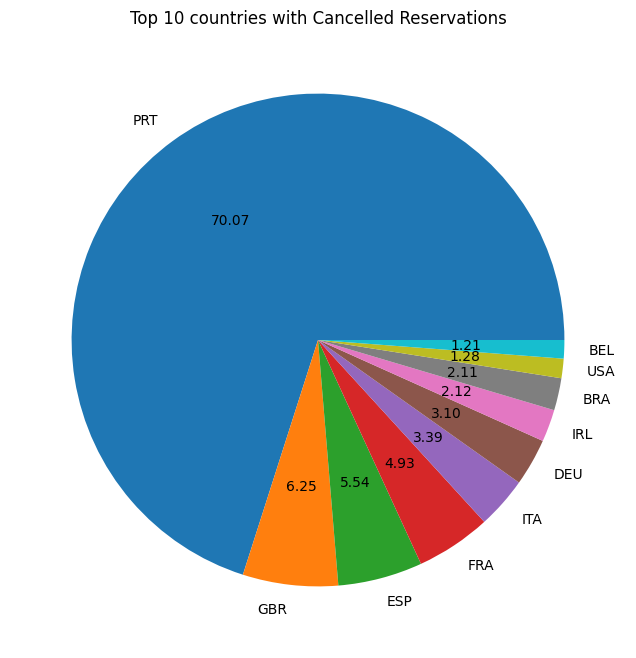

In [ ]:
plt.figure(figsize = (10,8))
plt.pie(top_10_countries, labels = top_10_countries.index, autopct = '%.2f')
plt.title('Top 10 countries with Cancelled Reservations')
plt.show()

In [ ]:
df['market_segment'].value_counts(normalize = True)

Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: market_segment, dtype: float64

In [ ]:
cancelled_data['market_segment'].value_counts(normalize = True)

Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: market_segment, dtype: float64

In [ ]:
not_cancelled_data = df[df['is_canceled'] == 0]

In [ ]:
cancelled_data_adr = cancelled_data.groupby('reservation_status_date')['adr'].mean().reset_index().sort_values(by = 'reservation_status_date', ascending = False)
not_cancelled_data_adr = not_cancelled_data.groupby('reservation_status_date')['adr'].mean().reset_index().sort_values(by = 'reservation_status_date', ascending = False)

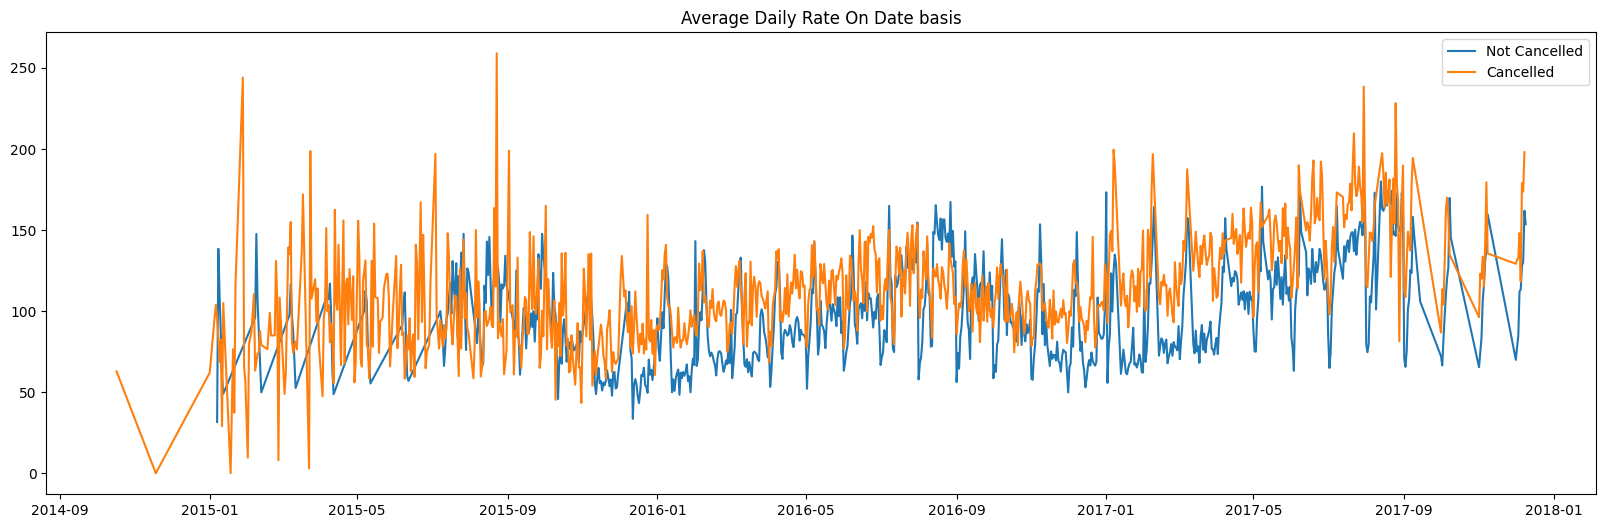

In [ ]:
plt.figure(figsize = (20,6))
plt.title('Average Daily Rate On Date basis')
plt.plot(not_cancelled_data_adr['reservation_status_date'], not_cancelled_data_adr['adr'], label = 'Not Cancelled')
plt.plot(cancelled_data_adr['reservation_status_date'], cancelled_data_adr['adr'], label = 'Cancelled')
plt.legend()
plt.show()

**Since the data is messy and days of records are missing we are filtering the data that is accurate between 2016 and Sept 2017**

In [ ]:
cancelled_data_adr = cancelled_data_adr[(cancelled_data_adr['reservation_status_date'] > '2016') & (cancelled_data_adr['reservation_status_date'] < '2017-09')]
not_cancelled_data_adr = not_cancelled_data_adr[(not_cancelled_data_adr['reservation_status_date'] > '2016') & (not_cancelled_data_adr['reservation_status_date'] < '2017-09')]

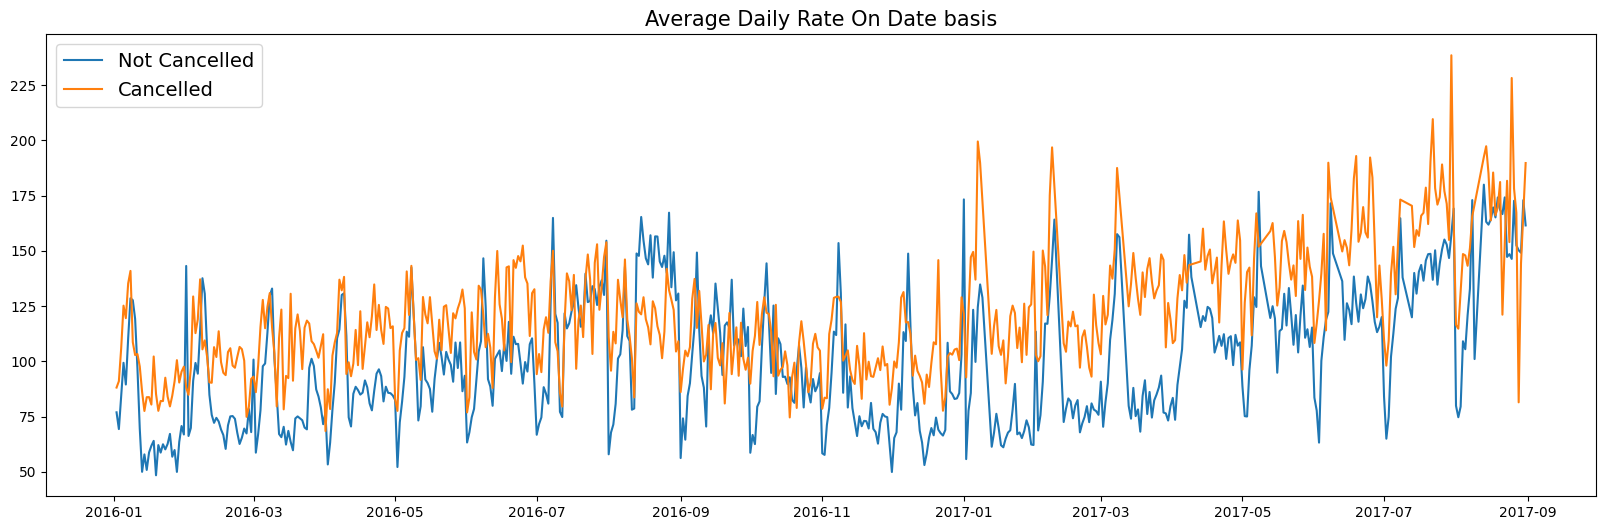

In [ ]:
plt.figure(figsize = (20,6))
plt.title('Average Daily Rate On Date basis', fontsize = 15)
plt.plot(not_cancelled_data_adr['reservation_status_date'], not_cancelled_data_adr['adr'], label = 'Not Cancelled')
plt.plot(cancelled_data_adr['reservation_status_date'], cancelled_data_adr['adr'], label = 'Cancelled')
plt.legend(fontsize = 14)
plt.show()